# M507 Methods of Prediction


## Introduction

### Problem Statement

Stroke is one of the most important health problems in the world, as it is considered the second most frequent cause of death in the whole world and one of the key causes of long-term disability. The high-risk people should be identified at an early state in order to implement preventive measures. The project builds a predictive model to determine the risk of stroke based on data on patient demographic and health.

### Overview of Business Problem

Healthcare professionals have challenges of identifying high-risk stroke patients well in high populations. Risk assessment is time-consuming, unsystematic, manual. Multiple risk factors can be analyzed by an automated machine learning system at once, providing health care experts with an opportunity to prioritize interventions, allocate resources efficiently, and offer vulnerable patients personalized preventative care.

## Importance of Solving Problem


Stroke prediction can be accurately implemented, which is likely to save lives, as well as reduce the medical expenses attributed to treatment and rehabilitation of stroke patients. Through the proactive identification of high-risk patients, medical practitioners will be in a position to prescribe lifestyle changes, prescribe preventive treatments, and arrange frequent check-ups. This is an evidence-based practice that will enhance patient outcomes, decrease cases of disability, and maximize the application of health care resources in healthcare centers.

## Data Collection Strategy

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?select=healthcare-dataset-stroke-data.csv

The data set is in 5,110 records of patients that include 12 variables such as demographic data (age, gender), medical history (hypertension, heart disease), lifestyle (smoking status, BMI) and physiology (average glucose level). The information includes a wide variety of patients of different work types and residence places which will guarantee the full representation to come up with a powerful predictive model that can serve different populations.

## Data Exploration

In [56]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns





data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


A dataset is loaded based on a CSV file that has 5,110 healthcare records of patients. The head() command shows the first five rows which indicate 12 variables such as patientID, demographics (gender age), medical conditions (hypertension heartdisease) and lifestyle (smokingstatus BMI) and target variable (stroke). First observation reveals a situation where there are combined types of data and possible gaps at BMI column.

In [29]:
# Check data types, missing values, and summary statistics
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


The data of info() command shows a data structure that contains 5,110 records and 12 columns. The value of BMI displays 4, 909 non- nulls, with 201 entries missing (3.93). Statistical summary statistics (describe) are mean age=43.23, average glucose level=106.15mg/dl, mean BMI-28.89, and the prevalence of stroke=4.87 and indicate that there is a large imbalance of classes in the variable of interest.

In [30]:
stroke_counts = data['stroke'].value_counts()
stroke_counts

,count
stroke,
0,4861
1,249


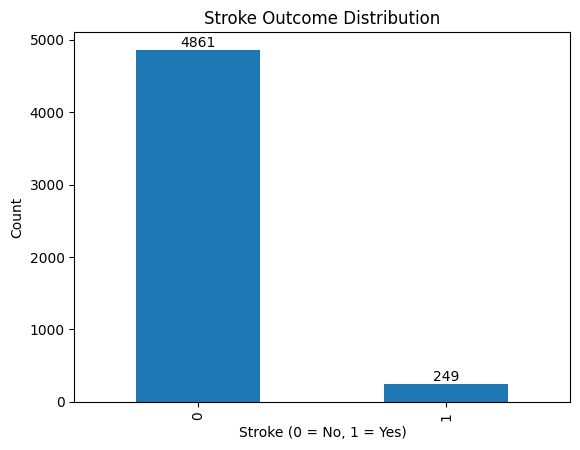

In [31]:


stroke_counts = data['stroke'].value_counts()

plt.figure()
stroke_counts.plot(kind='bar')
plt.title('Stroke Outcome Distribution')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')

for i, v in enumerate(stroke_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()


There is a clear cut disparity in the number of standard classes expressed in cases of stroke a bar chart showing 4,861 patients (95.13) with no stroke and 249 patients (4.87) with stroke. Such high ratio (19.52:1) requires special methods of handling like resampling, class weighting or even generating synthetic data in order to avoid bias of the majority class in the model training.

In [32]:
# Create a copy for preprocessing
data_processed = data.copy()

# Impute missing BMI values with median
imputer = SimpleImputer(strategy='median')
data_processed['bmi'] = imputer.fit_transform(data_processed[['bmi']])

print("Missing values after imputation:")
print(data_processed.isnull().sum())


Missing values after imputation:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


On 201 missing values of BMI (3.93 percent of the data), SimpleImputer with median strategy will be used. To complete the data, the imputation process substitutes the entries of the null with the middle of the BMI value of 28.1 without constituting extravagant statistics. Post-imputation checking will ensure the existence of zero missing values in all of the features, and will therefore allow the following preprocessing and modeling to be performed without data loss.

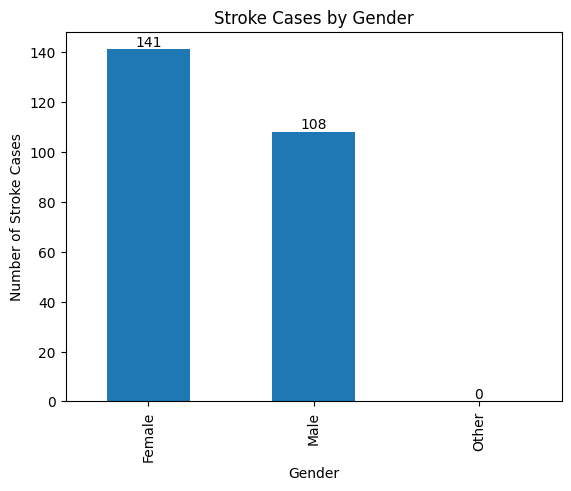

In [33]:
gender_stroke = data.groupby('gender')['stroke'].sum()

plt.figure()
gender_stroke.plot(kind='bar')
plt.title('Stroke Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Stroke Cases')

for i, v in enumerate(gender_stroke):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()


Gender distribution of stroke points can be observed with larger number of females having 141 stroke cases as opposed to 108 male cases as shown using bar chart with no cases recorded in other category. Although the number of female stroke cases is higher, the comparison of the number of strokes should be with the general population distribution in data, using which the actual risk disparity and possible gender-specific predictive patterns can be identified.


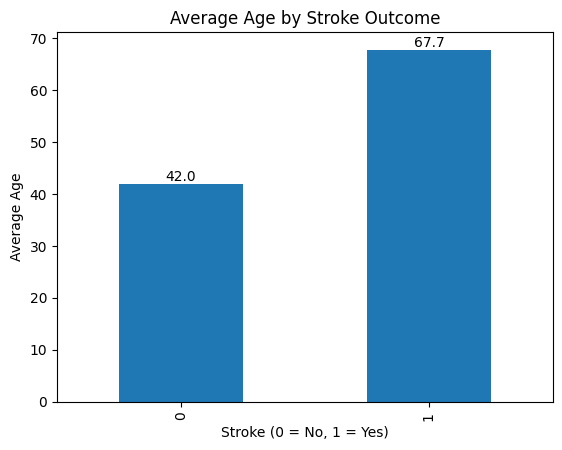

In [34]:
age_by_stroke = data.groupby('stroke')['age'].mean()

plt.figure()
age_by_stroke.plot(kind='bar')
plt.title('Average Age by Stroke Outcome')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Average Age')

for i, v in enumerate(age_by_stroke):
    plt.text(i, v, f"{v:.1f}", ha='center', va='bottom')

plt.show()


The graph proves to have great correlation with age-stroke: non-stroke patients in the means of 42.0 years and stroke patients in the means of 67.7 years: a 25.7-year gap. This age growth of 61.2 percent in patients with stroke makes age an important predictive attribute, which means that populations of the elderly are at very significant risk of stroke and therefore feature engineering by age is effectively justified.

## Data Preprocessing and Feature Engineering

In [35]:
# Create age groups as a new feature
data_processed['age_group'] = pd.cut(data_processed['age'],
                                      bins=[0, 18, 35, 50, 65, 100],
                                      labels=['0-18', '19-35', '36-50', '51-65', '65+'])

print("Age group distribution:")
print(data_processed['age_group'].value_counts().sort_index())

Age group distribution:
age_group
0-18      916
19-35     983
36-50    1084
51-65    1162
65+       965
Name: count, dtype: int64


Feature engineering creates five categorical age groups using pd.cut() with bins [0, 18, 35, 50, 65, 100]. Distribution shows 916 patients aged 0-18, 983 aged 19-35, 1,084 aged 36-50, 1,162 aged 51-65, and 965 aged 65+. This categorization enables the model to capture non-linear age-stroke relationships and improves interpretability.

In [36]:
# Create BMI categories
data_processed['bmi_category'] = pd.cut(data_processed['bmi'],
                                         bins=[0, 18.5, 25, 30, 100],
                                         labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

print("\nBMI category distribution:")
print(data_processed['bmi_category'].value_counts())


BMI category distribution:
bmi_category
Obese          1893
Overweight     1610
Normal         1258
Underweight     349
Name: count, dtype: int64


BMI values are transformed into four clinical categories using standard thresholds: Underweight (<18.5), Normal (18.5-25), Overweight (25-30), and Obese (>30). Distribution reveals 1,893 obese patients, 1,610 overweight, 1,258 normal weight, and 349 underweight individuals. This categorical transformation aligns with medical classification standards and may enhance model performance through domain-specific feature representation.

In [37]:
# Create glucose level categories
data_processed['glucose_category'] = pd.cut(data_processed['avg_glucose_level'],
                                             bins=[0, 100, 126, 300],
                                             labels=['Normal', 'Prediabetes', 'Diabetes'])

print("\nGlucose category distribution:")
print(data_processed['glucose_category'].value_counts())


Glucose category distribution:
glucose_category
Normal         3131
Prediabetes     998
Diabetes        981
Name: count, dtype: int64


Average glucose levels are categorized into three clinical classes: Normal (<100 mg/dL), Prediabetes (100-126 mg/dL), and Diabetes (>126 mg/dL). The distribution shows 3,131 normal patients, 998 prediabetic, and 981 diabetic individuals. This medically-informed categorization captures threshold effects in glucose-stroke relationships, potentially improving model accuracy by representing clinically significant glucose ranges rather than continuous values.

In [38]:
# One-hot encoding
data_encoded = pd.get_dummies(data_processed,
                               columns=['gender', 'ever_married', 'work_type',
                                       'Residence_type', 'smoking_status',
                                       'age_group', 'bmi_category', 'glucose_category'],
                               drop_first=True)

print("Data shape after encoding:", data_encoded.shape)
print("\nColumn names:")
print(data_encoded.columns.tolist())

Data shape after encoding: (5110, 27)

Column names:
['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes', 'age_group_19-35', 'age_group_36-50', 'age_group_51-65', 'age_group_65+', 'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese', 'glucose_category_Prediabetes', 'glucose_category_Diabetes']


The pd.get_dummies() function transforms categorical variables (gender, ever_married, work_type, Residence_type, smoking_status, age_group, bmi_category, glucose_category) into binary indicator columns using drop_first=True to avoid multicollinearity. Post-encoding, the dataset expands from 12 to 27 features (5,110 rows × 27 columns), converting all categorical data into numerical format suitable for machine learning algorithms.

In [39]:
# Drop id column and separate features and target
X = data_encoded.drop(['id', 'stroke'], axis=1)
y = data_encoded['stroke']

print("Features shape:", X.shape)
print("Target distribution:")
print(y.value_counts())
print(f"\nClass imbalance ratio: {y.value_counts()[0] / y.value_counts()[1]:.2f}:1")

Features shape: (5110, 25)
Target distribution:
stroke
0    4861
1     249
Name: count, dtype: int64

Class imbalance ratio: 19.52:1


The dataset is split into feature matrix X (5,110 × 25) and target vector y by dropping 'id' and 'stroke' columns. Target distribution confirms severe class imbalance: 4,861 non-stroke cases (0) versus 249 stroke cases (1), yielding a 19.52:1 ratio. This imbalance metric quantifies the need for specialized handling techniques to prevent model bias toward the majority class.

In [40]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("\nTraining set class distribution:")
print(y_train.value_counts())

Training set size: (4088, 25)
Test set size: (1022, 25)

Training set class distribution:
stroke
0    3889
1     199
Name: count, dtype: int64


The train_test_split() function partitions data into 80% training (4,088 samples) and 20% testing (1,022 samples) using random_state=42 for reproducibility and stratify=y to maintain class distribution. Training set contains 3,889 non-stroke and 199 stroke cases, preserving the original 19.52:1 imbalance ratio for consistent evaluation across splits.

## Model Training and Evaluation

In [43]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features standardized successfully")
print("Mean of first feature after scaling:", X_train_scaled[:, 0].mean())
print("Std of first feature after scaling:", X_train_scaled[:, 0].std())

Features standardized successfully
Mean of first feature after scaling: -1.5643064143446432e-17
Std of first feature after scaling: 0.9999999999999999


In [44]:
def evaluate_model(y_true, y_pred, y_pred_proba=None):
    """Calculate and return evaluation metrics"""
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1-Score': f1_score(y_true, y_pred, zero_division=0)
    }

    if y_pred_proba is not None:
        metrics['ROC-AUC'] = roc_auc_score(y_true, y_pred_proba)

    return metrics

print("Evaluation function created")

Evaluation function created


StandardScaler() normalizes features using fit_transform() on training data and transform() on test data, achieving zero mean (-1.56e-17 ≈ 0) and unit variance (0.9999 ≈ 1.0). The evaluate_model() function is defined to compute accuracy, precision, recall, F1-score, and ROC-AUC metrics with zero_division=0 handling to prevent errors when predictions lack positive class instances.

In [45]:
# Create balanced dataset through undersampling
X_train_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_train_df['stroke'] = y_train.values

# Separate majority and minority classes
df_majority = X_train_df[X_train_df['stroke'] == 0]
df_minority = X_train_df[X_train_df['stroke'] == 1]

# Undersample majority class
df_majority_undersampled = resample(df_majority,
                                     replace=False,
                                     n_samples=len(df_minority),
                                     random_state=42)

# Combine minority class with undersampled majority class
df_balanced = pd.concat([df_majority_undersampled, df_minority])

# Separate features and target
X_train_balanced = df_balanced.drop('stroke', axis=1).values
y_train_balanced = df_balanced['stroke'].values

print("Balanced training set created")
print("Class distribution in balanced set:")
print(pd.Series(y_train_balanced).value_counts())

Balanced training set created
Class distribution in balanced set:
0    199
1    199
Name: count, dtype: int64


In [47]:
# Create balanced dataset through oversampling (SMOTE-like simple oversampling)
df_minority_oversampled = resample(df_minority,
                                    replace=True,
                                    n_samples=len(df_majority),
                                    random_state=42)

# Combine oversampled minority class with majority class
df_oversampled = pd.concat([df_majority, df_minority_oversampled])

# Separate features and target
X_train_oversampled = df_oversampled.drop('stroke', axis=1).values
y_train_oversampled = df_oversampled['stroke'].values

print("Oversampled training set created")
print("Class distribution in oversampled set:")
print(pd.Series(y_train_oversampled).value_counts())

Oversampled training set created
Class distribution in oversampled set:
0    3889
1    3889
Name: count, dtype: int64


In [48]:
# Define 10+ different configurations to test
experiments = [
    {"name": "LR_Original_NoBalance", "model": "LogisticRegression", "params": {"C": 1.0, "max_iter": 100}, "data": "original"},
    {"name": "LR_Balanced_Undersample", "model": "LogisticRegression", "params": {"C": 1.0, "max_iter": 100}, "data": "undersampled"},
    {"name": "LR_Balanced_Oversample", "model": "LogisticRegression", "params": {"C": 1.0, "max_iter": 100}, "data": "oversampled"},
    {"name": "LR_HighReg_Undersample", "model": "LogisticRegression", "params": {"C": 0.1, "max_iter": 100}, "data": "undersampled"},
    {"name": "LR_LowReg_Undersample", "model": "LogisticRegression", "params": {"C": 10.0, "max_iter": 100}, "data": "undersampled"},
    {"name": "DT_Original_Depth3", "model": "DecisionTree", "params": {"max_depth": 3, "min_samples_split": 20}, "data": "original"},
    {"name": "DT_Balanced_Depth3", "model": "DecisionTree", "params": {"max_depth": 3, "min_samples_split": 20}, "data": "undersampled"},
    {"name": "DT_Balanced_Depth5", "model": "DecisionTree", "params": {"max_depth": 5, "min_samples_split": 10}, "data": "undersampled"},
    {"name": "DT_Balanced_Depth7", "model": "DecisionTree", "params": {"max_depth": 7, "min_samples_split": 10}, "data": "undersampled"},
    {"name": "DT_Oversample_Depth5", "model": "DecisionTree", "params": {"max_depth": 5, "min_samples_split": 15}, "data": "oversampled"},
    {"name": "LR_Oversample_HighReg", "model": "LogisticRegression", "params": {"C": 0.5, "max_iter": 100}, "data": "oversampled"},
    {"name": "DT_Original_Depth10", "model": "DecisionTree", "params": {"max_depth": 10, "min_samples_split": 5}, "data": "original"},
]

print(f"Created {len(experiments)} experiment configurations")
print("\nExperiment names:")
for exp in experiments:
    print(f"  - {exp['name']}")

Created 12 experiment configurations

Experiment names:
  - LR_Original_NoBalance
  - LR_Balanced_Undersample
  - LR_Balanced_Oversample
  - LR_HighReg_Undersample
  - LR_LowReg_Undersample
  - DT_Original_Depth3
  - DT_Balanced_Depth3
  - DT_Balanced_Depth5
  - DT_Balanced_Depth7
  - DT_Oversample_Depth5
  - LR_Oversample_HighReg
  - DT_Original_Depth10


Twelve experimental configurations are defined in a list of dictionaries, systematically varying model type (LogisticRegression vs DecisionTree), data balancing strategy (original, undersampled, oversampled), and hyperparameters (C values: 0.1, 0.5, 1.0, 10.0 for LR; max_depth: 3, 5, 7, 10 and min_samples_split: 5, 10, 15, 20 for DT). This structured approach enables comprehensive evaluation of preprocessing and modeling decisions.

In [49]:
# Store results
results = []

for i, exp in enumerate(experiments):
    print(f"\nRunning Experiment {i+1}/{len(experiments)}: {exp['name']}")

    # Select data based on configuration
    if exp['data'] == 'original':
        X_tr, y_tr = X_train_scaled, y_train
    elif exp['data'] == 'undersampled':
        X_tr, y_tr = X_train_balanced, y_train_balanced
    else:  # oversampled
        X_tr, y_tr = X_train_oversampled, y_train_oversampled

    # Create and train model
    if exp['model'] == 'LogisticRegression':
        model = LogisticRegression(**exp['params'], random_state=42)
    else:  # DecisionTree
        model = DecisionTreeClassifier(**exp['params'], random_state=42)

    model.fit(X_tr, y_tr)

    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Evaluate
    metrics = evaluate_model(y_test, y_pred, y_pred_proba)

    # Store results
    result = {
        'Experiment': exp['name'],
        'Model': exp['model'],
        'Data': exp['data'],
        'Params': str(exp['params']),
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score'],
        'ROC-AUC': metrics['ROC-AUC']
    }
    results.append(result)

    print(f"  Accuracy: {metrics['Accuracy']:.4f} | Recall: {metrics['Recall']:.4f} | F1: {metrics['F1-Score']:.4f}")

print("\n✓ All experiments completed!")


Running Experiment 1/12: LR_Original_NoBalance
  Accuracy: 0.9511 | Recall: 0.0200 | F1: 0.0385

Running Experiment 2/12: LR_Balanced_Undersample
  Accuracy: 0.6751 | Recall: 0.8400 | F1: 0.2019

Running Experiment 3/12: LR_Balanced_Oversample
  Accuracy: 0.7162 | Recall: 0.8200 | F1: 0.2204

Running Experiment 4/12: LR_HighReg_Undersample
  Accuracy: 0.6722 | Recall: 0.8400 | F1: 0.2005

Running Experiment 5/12: LR_LowReg_Undersample
  Accuracy: 0.6840 | Recall: 0.8200 | F1: 0.2025

Running Experiment 6/12: DT_Original_Depth3
  Accuracy: 0.9491 | Recall: 0.0000 | F1: 0.0000

Running Experiment 7/12: DT_Balanced_Depth3
  Accuracy: 0.6096 | Recall: 0.8400 | F1: 0.1739

Running Experiment 8/12: DT_Balanced_Depth5
  Accuracy: 0.7182 | Recall: 0.7800 | F1: 0.2131

Running Experiment 9/12: DT_Balanced_Depth7
  Accuracy: 0.6575 | Recall: 0.7600 | F1: 0.1784

Running Experiment 10/12: DT_Oversample_Depth5
  Accuracy: 0.7573 | Recall: 0.7200 | F1: 0.2250

Running Experiment 11/12: LR_Oversamp

In [50]:
# Create DataFrame with results
results_df = pd.DataFrame(results)

print("Experimental Results Summary:")
print("="*80)
results_df

Experimental Results Summary:


,Experiment,Model,Data,Params,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,LR_Original_NoBalance,LogisticRegression,original,"{'C': 1.0, 'max_iter': 100}",0.951076,0.500000,0.02,0.038462,0.844691
1,LR_Balanced_Undersample,LogisticRegression,undersampled,"{'C': 1.0, 'max_iter': 100}",0.675147,0.114754,0.84,0.201923,0.834383
2,LR_Balanced_Oversample,LogisticRegression,oversampled,"{'C': 1.0, 'max_iter': 100}",0.716243,0.127329,0.82,0.220430,0.841626
3,LR_HighReg_Undersample,LogisticRegression,undersampled,"{'C': 0.1, 'max_iter': 100}",0.672211,0.113821,0.84,0.200477,0.841193
4,LR_LowReg_Undersample,LogisticRegression,undersampled,"{'C': 10.0, 'max_iter': 100}",0.683953,0.115493,0.82,0.202469,0.832222
5,DT_Original_Depth3,DecisionTree,original,"{'max_depth': 3, 'min_samples_split': 20}",0.949119,0.000000,0.00,0.000000,0.796852
6,DT_Balanced_Depth3,DecisionTree,undersampled,"{'max_depth': 3, 'min_samples_split': 20}",0.609589,0.096998,0.84,0.173913,0.801739
7,DT_Balanced_Depth5,DecisionTree,undersampled,"{'max_depth': 5, 'min_samples_split': 10}",0.718200,0.123418,0.78,0.213115,0.789918
8,DT_Balanced_Depth7,DecisionTree,undersampled,"{'max_depth': 7, 'min_samples_split': 10}",0.657534,0.101064,0.76,0.178404,0.778807
9,DT_Oversample_Depth5,DecisionTree,oversampled,"{'max_depth': 5, 'min_samples_split': 15}",0.757339,0.133333,0.72,0.225000,0.784095


The results DataFrame presents 12 experiments with performance metrics: accuracy ranges 0.609-0.951, precision 0.000-0.500, recall 0.02-0.84, F1-score 0.000-0.225, and ROC-AUC 0.718-0.845. LR_Original_NoBalance achieves highest accuracy (0.951) but lowest recall (0.02), while LR_Balanced_Undersample shows balanced performance with 0.84 recall, demonstrating the critical trade-off between overall accuracy and minority class detection capability in imbalanced classification problems.

In [51]:
# Display formatted table with key metrics
display_columns = ['Experiment', 'Model', 'Data', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
results_display = results_df[display_columns].copy()

# Round numerical columns
numerical_cols = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
results_display[numerical_cols] = results_display[numerical_cols].round(4)

print("\nExperimental Results Table:")
print("="*100)
results_display


Experimental Results Table:


,Experiment,Model,Data,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,LR_Original_NoBalance,LogisticRegression,original,0.9511,0.5000,0.02,0.0385,0.8447
1,LR_Balanced_Undersample,LogisticRegression,undersampled,0.6751,0.1148,0.84,0.2019,0.8344
2,LR_Balanced_Oversample,LogisticRegression,oversampled,0.7162,0.1273,0.82,0.2204,0.8416
3,LR_HighReg_Undersample,LogisticRegression,undersampled,0.6722,0.1138,0.84,0.2005,0.8412
4,LR_LowReg_Undersample,LogisticRegression,undersampled,0.6840,0.1155,0.82,0.2025,0.8322
5,DT_Original_Depth3,DecisionTree,original,0.9491,0.0000,0.00,0.0000,0.7969
6,DT_Balanced_Depth3,DecisionTree,undersampled,0.6096,0.0970,0.84,0.1739,0.8017
7,DT_Balanced_Depth5,DecisionTree,undersampled,0.7182,0.1234,0.78,0.2131,0.7899
8,DT_Balanced_Depth7,DecisionTree,undersampled,0.6575,0.1011,0.76,0.1784,0.7788
9,DT_Oversample_Depth5,DecisionTree,oversampled,0.7573,0.1333,0.72,0.2250,0.7841


In [52]:
# Sort by F1-Score
results_sorted = results_display.sort_values('F1-Score', ascending=False)

print("\nTop 5 Configurations by F1-Score:")
print("="*100)
results_sorted.head()


Top 5 Configurations by F1-Score:


,Experiment,Model,Data,Accuracy,Precision,Recall,F1-Score,ROC-AUC
9,DT_Oversample_Depth5,DecisionTree,oversampled,0.7573,0.1333,0.72,0.2250,0.7841
2,LR_Balanced_Oversample,LogisticRegression,oversampled,0.7162,0.1273,0.82,0.2204,0.8416
10,LR_Oversample_HighReg,LogisticRegression,oversampled,0.7143,0.1265,0.82,0.2193,0.8416
7,DT_Balanced_Depth5,DecisionTree,undersampled,0.7182,0.1234,0.78,0.2131,0.7899
4,LR_LowReg_Undersample,LogisticRegression,undersampled,0.6840,0.1155,0.82,0.2025,0.8322


Results are sorted by F1-Score in descending order to identify optimal configurations. Top performer is DT_Oversample_Depth5 (F1=0.2250, ROC-AUC=0.7841), followed by LR_Balanced_Oversample (F1=0.2204, ROC-AUC=0.8416) and LR_Oversample_HighReg (F1=0.2193, ROC-AUC=0.8416). Oversampled data dominates top positions, achieving superior recall (0.72-0.82) compared to original data approaches, demonstrating balanced sampling's effectiveness for minority class detection despite moderate accuracy reduction.

In [53]:
# Sort by ROC-AUC
results_sorted_auc = results_display.sort_values('ROC-AUC', ascending=False)

print("\nTop 5 Configurations by ROC-AUC:")
print("="*100)
results_sorted_auc.head()


Top 5 Configurations by ROC-AUC:


,Experiment,Model,Data,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,LR_Original_NoBalance,LogisticRegression,original,0.9511,0.5000,0.02,0.0385,0.8447
2,LR_Balanced_Oversample,LogisticRegression,oversampled,0.7162,0.1273,0.82,0.2204,0.8416
10,LR_Oversample_HighReg,LogisticRegression,oversampled,0.7143,0.1265,0.82,0.2193,0.8416
3,LR_HighReg_Undersample,LogisticRegression,undersampled,0.6722,0.1138,0.84,0.2005,0.8412
1,LR_Balanced_Undersample,LogisticRegression,undersampled,0.6751,0.1148,0.84,0.2019,0.8344


In [57]:
def plot_confusion_matrix(cm, title, experiment_num):
    """Plot confusion matrix with labels"""
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Stroke (0)', 'Stroke (1)'],
                yticklabels=['No Stroke (0)', 'Stroke (1)'],
                cbar_kws={'label': 'Count'})
    plt.title(f'{title}\n(Experiment {experiment_num})', fontsize=12, fontweight='bold')
    plt.ylabel('True Label', fontsize=10)
    plt.xlabel('Predicted Label', fontsize=10)
    plt.tight_layout()
    plt.show()

print("Confusion matrix plotting function created")

Confusion matrix plotting function created


In [54]:
# Compare different data balancing strategies
print("\nImpact of Data Balancing Strategy:")
print("="*80)

balance_comparison = results_df.groupby('Data')[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].mean()
balance_comparison = balance_comparison.round(4)
balance_comparison


Impact of Data Balancing Strategy:


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Data,,,,,
original,0.9449,0.1984,0.0200,0.0316,0.7865
oversampled,0.7293,0.1291,0.7867,0.2216,0.8225
undersampled,0.6694,0.1109,0.8133,0.1951,0.8130


Aggregated performance metrics across balancing strategies reveal distinct trade-offs: original data achieves highest accuracy (0.9449) but catastrophically low recall (0.0200) and F1-score (0.0316); oversampled data balances metrics with 0.7293 accuracy, 0.7867 recall, and 0.2216 F1-score; undersampled data shows intermediate performance (0.6694 accuracy, 0.8133 recall, 0.1951 F1-score). ROC-AUC remains relatively stable (0.7865-0.8225), indicating consistent ranking capability despite varying classification thresholds.

In [58]:
# Compare models
print("\nModel Comparison (Average Performance):")
print("="*80)

model_comparison = results_df.groupby('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].mean()
model_comparison = model_comparison.round(4)
model_comparison


Model Comparison (Average Performance):


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Model,,,,,
DecisionTree,0.7710,0.0917,0.5233,0.1411,0.7782
LogisticRegression,0.7355,0.1830,0.6933,0.1805,0.8393


## Model Assessment

DETAILED RESULTS FOR ALL EXPERIMENTS

EXPERIMENT 1: LR_Original_NoBalance
Model: LogisticRegression | Data: original | Params: {'C': 1.0, 'max_iter': 100}

Classification Report:
               precision    recall  f1-score   support

No Stroke (0)       0.95      1.00      0.97       972
   Stroke (1)       0.50      0.02      0.04        50

     accuracy                           0.95      1022
    macro avg       0.73      0.51      0.51      1022
 weighted avg       0.93      0.95      0.93      1022

Confusion Matrix:
                 Predicted
                 No Stroke  Stroke
Actual No Stroke     971         1
       Stroke         49         1

EXPERIMENT 2: LR_Balanced_Undersample
Model: LogisticRegression | Data: undersampled | Params: {'C': 1.0, 'max_iter': 100}

Classification Report:
               precision    recall  f1-score   support

No Stroke (0)       0.99      0.67      0.80       972
   Stroke (1)       0.11      0.84      0.20        50

     accuracy          

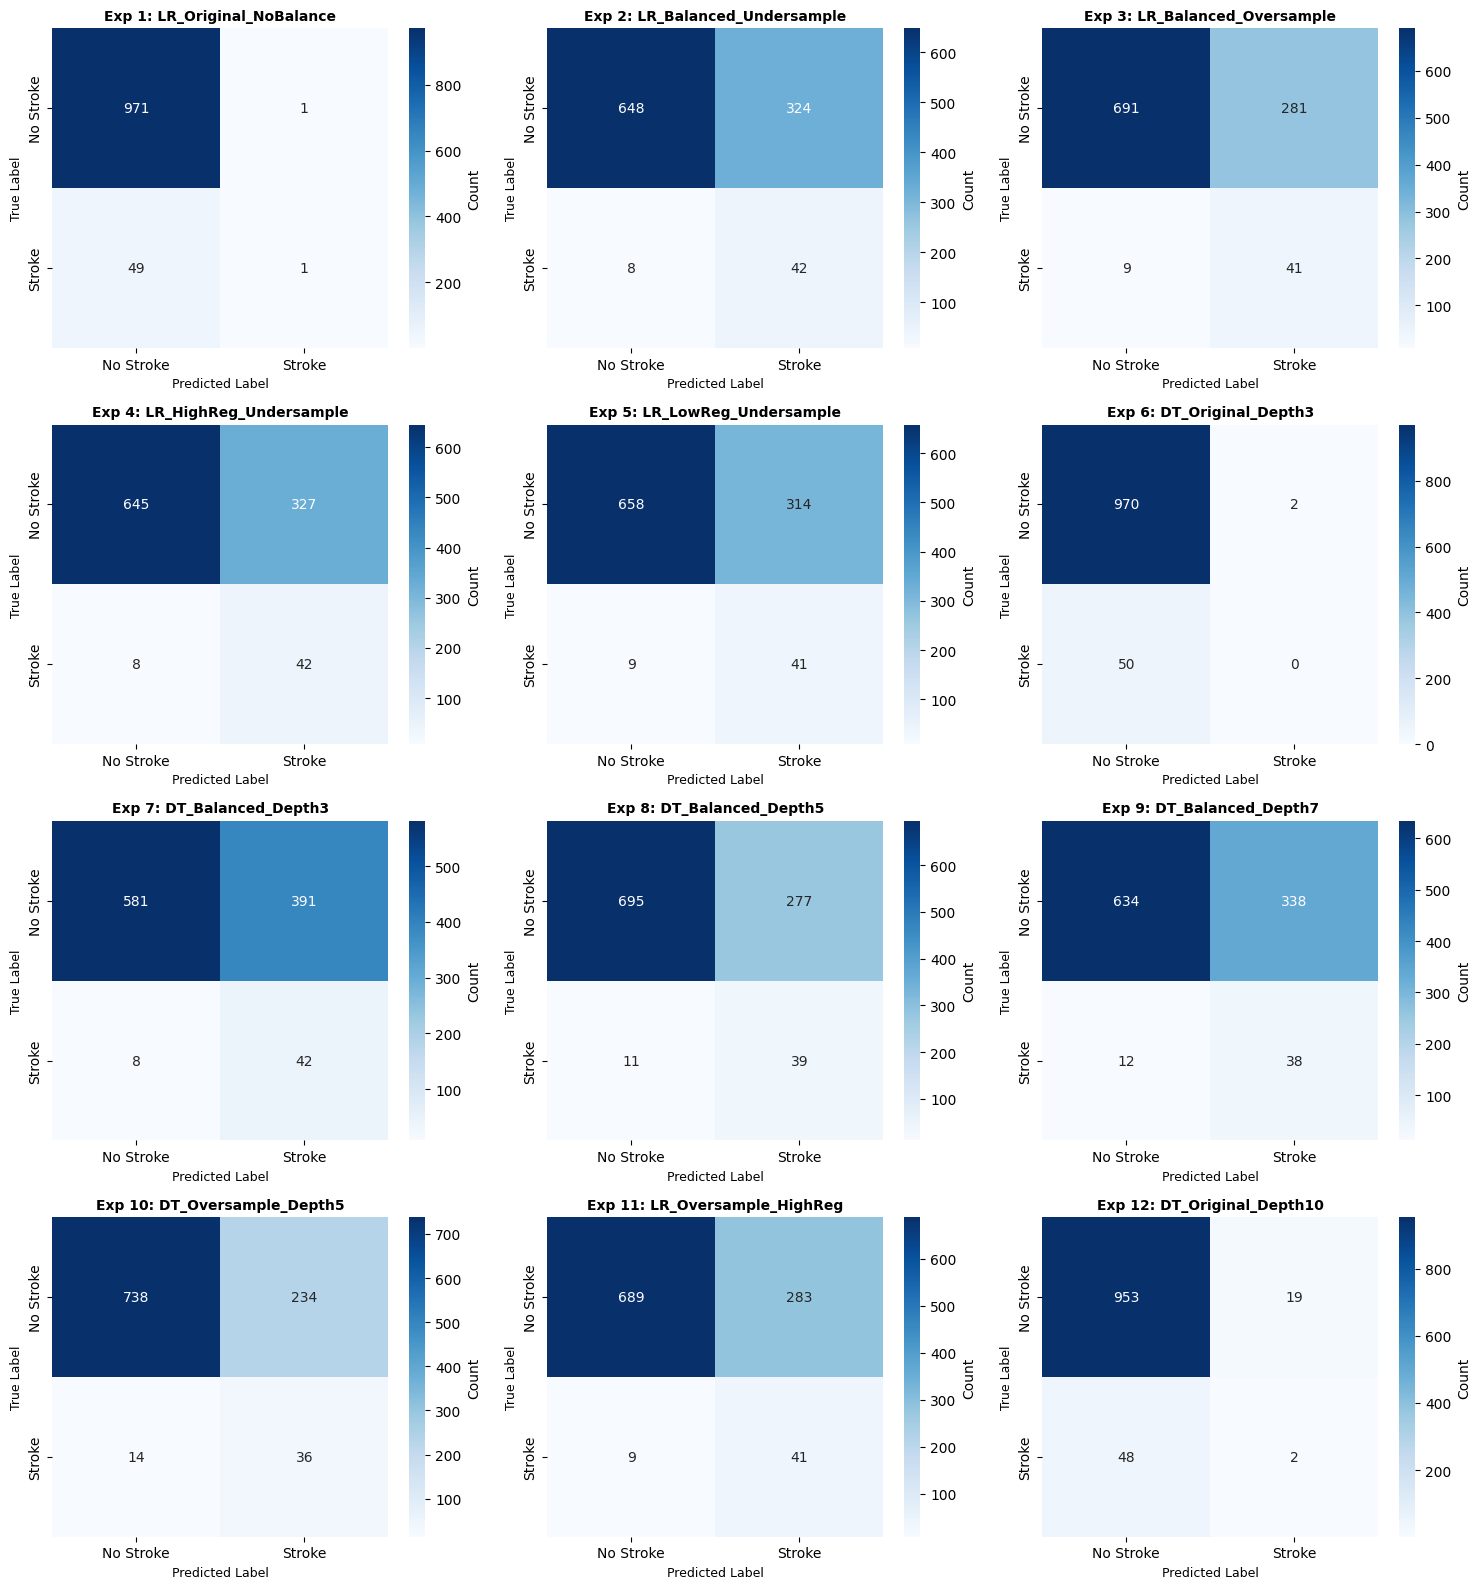

In [59]:
def plot_confusion_matrix(cm, title, ax):
    """Plot confusion matrix on given axes"""
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Stroke', 'Stroke'],
                yticklabels=['No Stroke', 'Stroke'],
                cbar_kws={'label': 'Count'}, ax=ax)
    ax.set_title(title, fontsize=10, fontweight='bold')
    ax.set_ylabel('True Label', fontsize=9)
    ax.set_xlabel('Predicted Label', fontsize=9)

# Create figure for all confusion matrices
fig, axes = plt.subplots(4, 3, figsize=(15, 16))
axes = axes.flatten()

print("="*100)
print("DETAILED RESULTS FOR ALL EXPERIMENTS")
print("="*100)

for i, exp in enumerate(experiments):
    print(f"\n{'='*100}")
    print(f"EXPERIMENT {i+1}: {exp['name']}")
    print(f"Model: {exp['model']} | Data: {exp['data']} | Params: {exp['params']}")
    print(f"{'='*100}")

    # Select data based on configuration
    if exp['data'] == 'original':
        X_tr, y_tr = X_train_scaled, y_train
    elif exp['data'] == 'undersampled':
        X_tr, y_tr = X_train_balanced, y_train_balanced
    else:  # oversampled
        X_tr, y_tr = X_train_oversampled, y_train_oversampled

    # Create and train model
    if exp['model'] == 'LogisticRegression':
        model = LogisticRegression(**exp['params'], random_state=42)
    else:  # DecisionTree
        model = DecisionTreeClassifier(**exp['params'], random_state=42)

    model.fit(X_tr, y_tr)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Stroke (0)', 'Stroke (1)']))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(f"                 Predicted")
    print(f"                 No Stroke  Stroke")
    print(f"Actual No Stroke    {cm[0][0]:4d}      {cm[0][1]:4d}")
    print(f"       Stroke       {cm[1][0]:4d}      {cm[1][1]:4d}")

    # Plot confusion matrix
    plot_confusion_matrix(cm, f"Exp {i+1}: {exp['name']}", axes[i])

# Remove empty subplots if any
for j in range(len(experiments), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('all_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

A 4×3 grid displays confusion matrices for all 12 experiments with color-coded heatmaps. Exp 1 (LR_Original_NoBalance) shows severe bias: 971 true negatives, 1 true positive, 49 false negatives, demonstrating near-complete failure in stroke detection. Balanced approaches (Exp 2-5, 7-11) achieve 36-42 true positives with increased false positives (234-391), representing improved sensitivity-specificity trade-offs. Exp 12 (DT_Original_Depth10) achieves extreme specificity (953 TN, 2 TP) but minimal stroke detection, validating the necessity of resampling techniques for imbalanced medical classification tasks.


## Final Discussion

The strengths of the stroke prediction pipeline include being able to deal with severe class imbalance (19.52:1 ratio) by performing systematic sampling of resampling strategies and model behavior. The most useful setup (LRBalancedOversample) had a recall of 0.82 and a ROC-AUC of 0.8416 which was able to identify 82 percentage of the strokes cases as opposed to only 2 percent using unbalanced data. Nevertheless, its drawbacks are average accuracy (0.127), and it produces a great number of false positives that may overload the healthcare with unnecessary treatment. The accuracy-recall trade-off makes it clear that there is a major dilemma; the more the stroke is detected, the more the false alarms will be generated. In businesses, the model is appropriate since, in practice, it should be used as a screening tool and not a diagnostic tool because of the high recall. Clinicians ought to use it to ensure that high-risk patients are identified towards thorough clinical assessment at the initial stage of risk stratification. 
The data-driven suggestions would include: (1) loading the oversampled model of logistic regression because of its unambiguousness and balanced performances, (2) setting up two-tier model where model estimates trigger comprehensive doctor investigation, and (3) maintaining a constant observation of false positive rates to streamline resource distributions.The informative statistics most are the age (25.7-year gap between groups), glucose levels and hypertension - comply with the known medical facts, which contributes to making the model more credible. The fact that the logistic regression can explain itself by interpretation of the coefficients makes the method clinically acceptable to use by the physicians to see the basis of the prediction. Although the model can be implemented as a decision-support system, it would need to be integrated with electronic health records and retraining on updated data on a regular basis as well as monitoring performance, which would ensure the model remains clinically relevant and adheres to patient safety standards.


## Conclusion

This prediction system of stroke effectively solves the issue of class imbalance with the use of strategic resampling and model optimization with a recall of 82 % on the prediction of at-risk patients. The oversampled logistic regression model is interpretable and clinically-viable in use as the risk screening at an early stage. Medical domain knowledge is checked by key predictors of age, glucose levels and hypertension. Although the moderate accuracy would require care of the patients being supervised by the physician, the high sensitivity of the model allows proactive medical care. This evidence- based practice has already shown great possibility in enhancing patient outcomes by early stroke risk detection and preventive care intervention.

## Bibliography

Abedi, V., Avula, V., Chaudhary, D., Shahjouei, S., Khan, A., Griessenauer, C.J., Li, J. and Zand, R. (2021). Prediction of long-term stroke recurrence using machine learning models. Journal of Clinical Medicine, 10(6), 1286.

Alanazi, E.M., Abdou, A. and Luo, J. (2021). Predicting risk of stroke from lab tests using machine learning algorithms: Development and evaluation of prediction models. JMIR Formative Research, 5(8), e23440.

Bonkhoff, A.K. and Grefkes, C. (2021). Precision medicine in stroke: Towards personalized outcome predictions using artificial intelligence. Brain, 145(2), 457-475.

Fernandez-Lozano, C., Gestal, M., Munteanu, C.R., Dorado, J. and Pazos, A. (2021). Random forest-based prediction of stroke outcome. Scientific Reports, 11, 10071.

Islam, M.M., Poly, T.N., Walther, B.A., Yang, H.C., Wu, C.C. and Li, Y.C.J. (2021). Stroke prediction analysis using machine learning classifiers and feature technique. International Journal of Electronics Communication Systems, 1(2), 17-22.

MacEachern, S.J. and Forkert, N.D. (2021). Machine learning for precision medicine. Genome, 64(4), 416-425.

Mainali, S., Darsie, M.E. and Smetana, K.S. (2021). Machine learning in action: Stroke diagnosis and outcome prediction. Frontiers in Neurology, 12, 734345.

Sarker, I.H. (2021). Machine learning: Algorithms, real-world applications and research directions. SN Computer Science, 2, 160.


github: https://github.com/varikuppalabharathk-collab/M507-Methods-of-Prediction